# Example document of columntracer package
Laboratory columns are widely used to study the fate and transport of solutes in porous media. Tracer studies are often performed on columns to assess their flow properties, including their velocity and dispersion coefficient. Tracers are needed before columns can be used to study chemical processes in the column media to separate out the flow effects.

Columntracer is a Python package for simulating the flow for a non-ractive tracer through a column.
This notebook explains how the package works. 

**Quick instructions:**Run the first cell to import package. Run the third cell to run a demo to view general functions. Examples for individual functions start from the forth cell.



# Table of contents
1. [Parameters of ColumnTracer class](#parameters)
2. [Demo run](#demo)
3. [Characteristic equation](#chara)
4. [Eigenvalues](#eigenvalues)
5. [Concentration profile](#conc_profile)
6. [Effluent concentration and breakthrough curve](#eff_conc)
7. [Calculate effluent concentration at a specified time](#eff_t)
8. [Find dispersion coeffient](#find_D)

## Parameters of ColumnTracer class <a name="parameters"></a>
The parameters of ColumnTracer class are:


|Parameter|Description|Default values|Unit|
|:----|:------------------------------------|:----:|:----|
|$C0$|Solute influent concentration ($ML^{-3}$)|100|$mg/l$|  
|$U$|Flow velocity in column ($LT^{-1}$)|10|$cm/h$|  
|$D$|Dispersion coefficient ($L^{2} T^{-1}$)|100|$cm^{2}/h$|  
|$L$|Length of column ($L$)|30|$cm$|
|$n$|number of terms to use in series solution|1000|unitless|
|$demo$|whether run a demo simulation|$False$|
|$demo$\_$plot$|whether plot the result figures of the demo simulation|$False$|
|$demo$\_$plot$\_$save$|whether save the figures to local folder|$False$|

The code below shows these parameters.

In [5]:
from columntracer import ColumnTracer

In [26]:
c = ColumnTracer(C0 = 100,
                 U = 10,
                 D = 100,
                 L = 30,
                 n = 1000,
                 demo = False,
                 demo_plot = False,
                 demo_plot_save = False)

## Demo run <a name="demo"></a>
By specifying <i>demo</i>=<i>True</i>, columntracer will perform a demo run. With <i>demo_plot</i>=<i>True</i>, three plots will be drawn: characteristic equation, concentration profile, and breakthrough curve. With <i>demo_plot_save</i>=<i>True</i>, the plots will be saved to current working directory as "characteristic_equation.png", "concentration_profile.png", and "breakthrough_curve.png" with 200 dpi. Parameters for demo are listed below.

|Parameter|Description|Values|Unit|
|:----|:------------------------------------|:----:|:----|
|$C0$|Solute influent concentration|100|$mg/l$|  
|$U$|Flow velocity in column|10|$cm/h$|  
|$D$|Dispersion coefficient|100|$cm^{2}/h$|  
|$L$|Length of column|30|$cm$|
|$n$|number of terms to use in series solution|1000|unitless|


              Default parameters for the demo are:
              solute influent concentration C0 = 100 mg/L,
              flow velocity in column U = 10 cm/h,
              dispersion coeffiecient D = 100 cm2/h,
              length of column L = 30 cm,
              number of terms to use in series solution n = 1000.
              


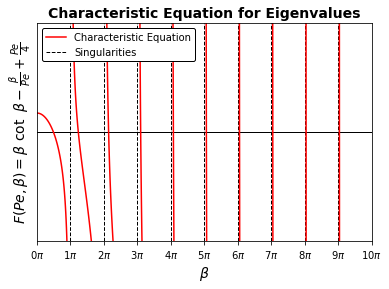

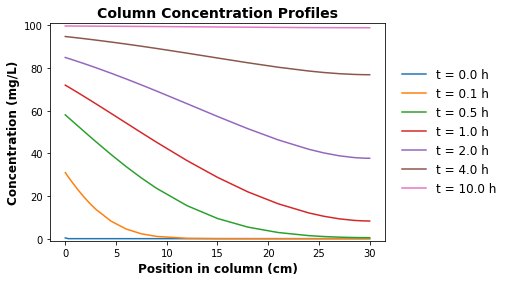

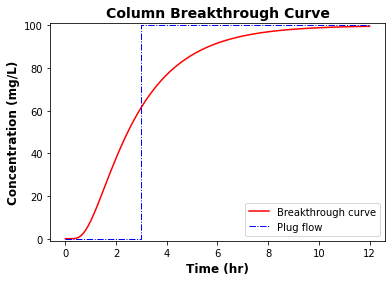

In [17]:
%matplotlib inline

c = ColumnTracer(demo = True,
                 demo_plot = True,
                 demo_plot_save = False)

## Characteristic equation <a name="chara"></a>
The characteristic equation can be calculated and plotted by function <i>characteristic_equation</i>. Three parameters are available:

|Parameter|Description|Default values|
|:---|:--------|:----:|
|$plot$|whether plot the result|$False$|
|$savefig$|whether save the plot|$False$|
|$savefig$\_$dpi$|dpi of the saved figure|200|
|$figsize$|size of the plot|(6.4, 4.8)|
|$dpi$|dpi of the plot|100|
|$chara$\_$color$|color of the characteristic equation|'r'|
|$chara$\_$width$|line width of the characteristic equation|1.5|
|$chara$\_$color$|color of the singularities|'k'|
|$chara$\_$color$|line width of the singularities|1|

For saving the figure, the <i>savefig</i> parameter can be either <i>True</i> or a string for file name.

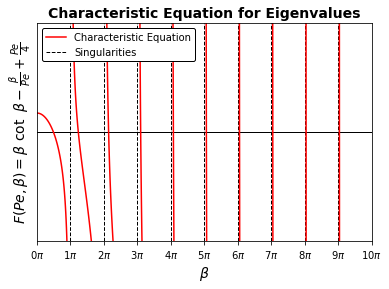

In [5]:
%matplotlib inline

c = ColumnTracer(C0 = 100,
                 U = 10,
                 D = 100,
                 L = 30,
                 n = 1000)

c.characteristic_equation(plot = True,
                          savefig = False,
                          savefig_dpi = 200)

## Eigenvalues <a name="eigenvalues"></a>
The root of characteristic equation is calculated by function <i>eigenvalues</i>, which uses Brent's method. The eigenvalues are calculated automatically when other fuctions are called according to demand. It's not necessary to call this function manually in practical use.

This function provides two parameters: <i>print_betas</i> and <i>print_number</i>. If <i>print_betas</i>=<i>True</i>, then this fuction will print betas. 

<i>print_number</i> determines how many betas are printed, the default is <i>print_number</i>=5, meaning to print first 5 betas. <i>print_number</i> must be integer but could be positive, negative or 0. 0 meaning print all betas, positive meaning print certain number of betas from the beginning, whereas negative meaning print from the end.

In [8]:
# n = 100 for less space usage
c = ColumnTracer(C0 = 100,
                 U = 10,
                 D = 100,
                 L = 30,
                 n = 100)

eigenvalue = c.eigenvalues(print_betas = True, 
                           print_number = 5)

The first 5 beta(s):
[1.5427188062985566, 3.8794819818627464, 6.72226996078815, 9.730673578382188, 12.799687136473834]


## Concentration profile <a name="conc_profile"></a>
The concentration profiles across the column at different points in time can be calculated by function <i>concentration_profile</i>. The parameters available are:

|Parameter|Description|Default values|
|:---|:--------|:----:|
|$times$|time points to estimate the function|listed below|
|$positions$|x values to estimate the function, must be numbers between 0 and 1|listed below|
|$tolerance$|how negatively concentrations can be|0.001|
|$plot$|whether plot the result|$False$|
|$figsize$|size of the plot|(6.4, 4.8)|
|$dpi$|dpi of the plot|100|
|$print$\_$conc$|whether print the calculated concentration|$False$|
|$savefig$|whether save the plot|$False$|
|$savefig$\_$dpi$|dpi of the saved figure|200|

This function returns a list of concentration lists. Each list is corresponding to a time in <i>times</i>, each list has a same length with <i>positions</i>.

Sometimes concentration can fall under 0 due to errors.<i>tolerance</i> determines how low concentration can be before triggering a warning. The threshold is <i>tolerance</i> $\times$ (-<i>C0</i>). The default <i>tolerance</i> is 0.001, with the default <i>C0</i>=100, the default threshold is -0.1.

For saving the figure, the <i>savefig</i> parameter can be either <i>True</i> or a string for file name.

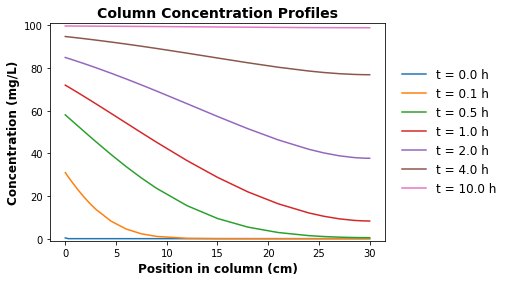

In [16]:
%matplotlib inline

c = ColumnTracer(C0 = 100,
                 U = 10,
                 D = 100,
                 L = 30,
                 n = 1000)

default_t = [0.00001, 0.1, 0.5, 1, 2, 4, 10]
default_pos = [0, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.98, 0.99, 1]
c_profile = c.concentration_profile(times = default_t, 
                                    positions = default_pos, 
                                    tolerance = 0.001,
                                    plot = True, 
                                    print_conc = False, 
                                    savefig = False, 
                                    savefig_dpi = 200)

If you wish to plot your own figures, you can follow the codes below.

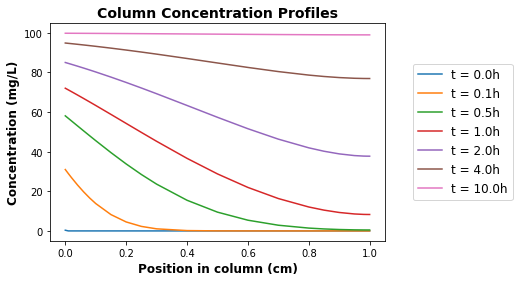

In [15]:
%matplotlib inline

# same with the last cell
import matplotlib.pyplot as plt
c = ColumnTracer(C0 = 100,
                 U = 10,
                 D = 100,
                 L = 30,
                 n = 1000)

default_t = [0.00001, 0.1, 0.5, 1, 2, 4, 10]
default_pos = [0, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.98, 0.99, 1]
c_profile = c.concentration_profile(times = default_t, 
                                    positions = default_pos, 
                                    plot = False, 
                                    print_conc = False)

# plotting
fig, ax = plt.subplots()
ax.set_xlabel('Position in column (cm)', size = 12, weight = 'bold')
ax.set_ylabel('Concentration (mg/L)', size = 12, weight = 'bold')
ax.set_title('Column Concentration Profiles', size = 14, weight = 'bold')

for t, cs in zip(default_t, c_profile):
    ax.plot(default_pos, cs, label = 't = {:.1f}h'.format(t))
ax.legend(loc = 'right', bbox_to_anchor = (1.4, 0.5), fontsize = 12)


## Effluent concentration and breakthrough curve <a name="eff_conc"></a>
The concentration at the outlet of a column is what is of primary interest for tracer studies. It can be calculated by function <i>effluent_concentration</i>. Parameters below are available:

|Parameter|Description|Default values|
|:---|:--------|:----:|
|$time$\_$end$|the end point of time period to calculate concentration|user input required|
|$interval$|time interval of the time period|user input required|
|$time$\_$start$|the start point of the time period|0|
|$tolerance$|how negatively concentrations can be|0.001|
|$plot$|whether plot the result|$False$|
|$figsize$|size of the plot|(6.4, 4.8)|
|$dpi$|dpi of the plot|100|
|$print$\_$conc$|whether print the calculated concentration|$False$|
|$savefig$|whether save the plot|$False$|
|$savefig$\_$dpi$|dpi of the saved figure|200|

Two parameters are required. One is the end time of the process, the other one is the time interval. The smaller time interval is, the more effluent concentrations will be calculated. In demo, <i>time_end</i> is 12 and <i>interval</i> is 0.1.

Sometimes concentration can fall under 0 due to errors.<i>tolerance</i> determines how low concentration can be before triggering a warning. The threshold is <i>tolerance</i> $\times$ (-<i>C0</i>). The default <i>tolerance</i> is 0.001, with the default <i>C0</i>=100, the default threshold is -0.1.

This function returns a list of concentration.

For saving the figure, the <i>savefig</i> parameter can be either <i>True</i> or a string for file name.

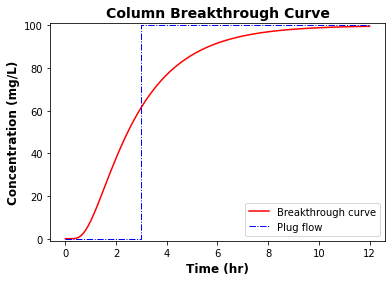

In [14]:
%matplotlib inline

c = ColumnTracer(C0 = 100,
                 U = 10,
                 D = 100,
                 L = 30,
                 n = 1000)
time_start = 0
time_end = 12
interval = 0.1
Cs = c.effluent_concentration(time_end = time_end,
                              interval = interval,
                              time_start = time_start,
                              tolerance = 0.001,
                              plot = True,
                              print_conc = False,
                              savefig = False,
                              savefig_dpi = 200)

If you wish to plot your own figures, you can follow the codes below.

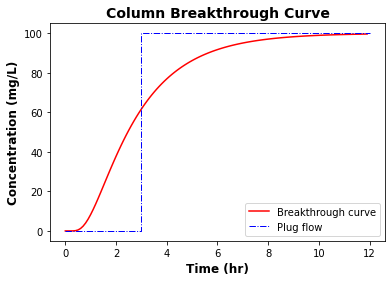

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# same with the last cell
C0 = 100
U = 10
D = 100
L = 30
n = 1000
c = ColumnTracer(C0 = C0,
                 U = U,
                 D = D,
                 L = L,
                 n = n)

time_start = 0
time_end = 12
interval = 0.1
Cs = c.effluent_concentration(time_end = time_end,
                              interval = interval,
                              time_start = time_start,
                              plot = False,
                              print_conc = False)

# plotting
time = np.arange(time_start, time_end, interval) 

fig, ax = plt.subplots()
ax.set_xlabel('Time (hr)', size = 12, weight = 'bold')
ax.set_ylabel('Concentration (mg/L)', size = 12, weight = 'bold')
ax.set_title('Column Breakthrough Curve', size = 14, weight = 'bold')

ax.plot(time, Cs, label = 'Breakthrough curve', ls = '-', c = 'r')

# if you want the plug flow line
xs = [0, L/U, L/U, time_end]
ys = [0, 0, C0, C0]
ax.plot(xs, ys, ls = '-.', lw = 1, c = 'b', label = 'Plug flow')
ax.legend()


## Calculate effluent concentration at a specified time and place <a name="eff_t"></a>
Function <i>get_concentration</i>can calculate effluent at given time. Two parameters are available: <i>time</i> and <i>x</i>. <i>time</i> is required. <i>x</i> is the position of the column and default value is 1. <i>x</i> must be a number between 0 and 1.

In [12]:
c = ColumnTracer(C0 = 100,
                 U = 10,
                 D = 100,
                 L = 30,
                 n = 1000)

eff = c.get_concentration(time = 9,
                        x = 1)
print(eff)

98.23279226730364


## Find dispersion coeffient <a name="find_D"><a/>
For lab application, dispersion coeffient is often unknown. Function <i>get_D</i> can fit effluent data to breakthrough curve to calculate dispersion coefficient. 

|Parameter|Description|Default values|
|:---|:--------|:----:|
|$time$|time data|user input required|
|$conc$|effluent concentration data|user input required|
|$max$\_$attempts$|the start point of the time period|20|
|$plot$|whether plot the result|$False$|
|$figsize$|size of the plot|(6.4, 4.8)|
|$dpi$|dpi of the plot|100|
|$savefig$|whether save the plot|$False$|
|$savefig$\_$dpi$|dpi of the saved figure|200|
    
<i>time</i> and <i>conc</i> should be lists of same length. The calculated dispersion coeffient and mean squared error (MSE) will be shown.

D is 71.00000245947587
MSE is 3.799145909980424e-12


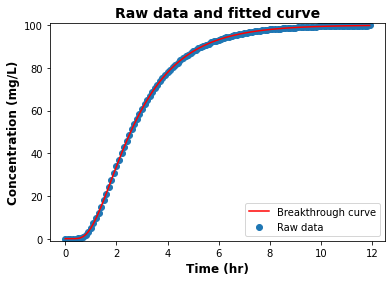

In [33]:
# use pandas to help read data from external csv file
import pandas as pd
import sys

# example data file is available in \Lib\site-packages\columntracer
# it's also available in the package repository: https://github.com/BYL4746/columntracer
path = sys.executable.split('python.exe')[0] + 'Lib\\site-packages\\columntracer\\'
data = pd.read_csv(path + 'data.csv')

# convert pandas DataFrame to lists
fit_t = data['time'].values.tolist()
fit_c = data['concentration'].values.tolist()

c = ColumnTracer(C0 = 100,
                 U = 10,
                 D = 100,
                 L = 30,
                 n = 1000)

c.fit_D(time = fit_t, 
        conc = fit_c, 
        max_attempts = 20,
        plot = True)